In [81]:
import numpy as np
import pandas as pd

well_log = pd.read_csv('/work/Carpe-Datum-2022/Well_Log/WELL_MASTER_TEST.csv')
well_log = well_log.replace({'Upper':1,'Lower':0})
well_log

,MD(ft),PORO(v/v),Permeability(mD),RHOB(g/cm3),DTS(us/ft),DT(us/ft),PEF(B/E),RD(OHMM),RS(OHMM),ROP,...,NPHI(v/v),Zone,well_id,X,Y,Completion Zone,AI_lower(2012-01-01),AI_upper(2012-01-01),AI_lower(2021-12-20),AI_upper(2021-12-20)
0,4494.121710,NaN,NaN,2.772266,142.276663,81.647933,0.049600,96.490013,107.692857,27.354978,...,0.299598,1.0,WP24,142095.82,86042.02,0,6478.848603,6386.648689,6516.903186,6390.063397
1,4500.681710,NaN,NaN,2.656538,132.659049,71.788689,0.055810,208.552927,313.951088,27.915585,...,0.120650,1.0,WP24,142095.82,86042.02,0,6478.848603,6386.648689,6516.903186,6390.063397
2,4507.241710,NaN,NaN,2.864760,180.607118,85.115478,0.049670,87.143680,118.799810,27.392174,...,0.350179,1.0,WP24,142095.82,86042.02,0,6478.848603,6386.648689,6516.903186,6390.063397
3,4513.801710,NaN,NaN,2.671301,107.850991,62.504709,0.059145,465.768442,634.031118,21.230820,...,0.055051,1.0,WP24,142095.82,86042.02,0,6478.848603,6386.648689,6516.903186,6390.063397
4,4520.361710,NaN,NaN,2.675240,110.743733,64.967730,0.061503,559.983047,928.257388,27.206763,...,0.066828,1.0,WP24,142095.82,86042.02,0,6478.848603,6386.648689,6516.903186,6390.063397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1958,4621.709384,NaN,NaN,2.374838,135.785777,NaN,0.047871,69.342820,58.848563,NaN,...,0.184682,0.0,WP4,109951.43,89343.45,0,6521.734693,6497.829295,6612.897190,6501.840702
1959,4628.269384,NaN,NaN,2.372950,142.063068,NaN,0.049452,57.399515,55.099689,28.555204,...,0.200350,0.0,WP4,109951.43,89343.45,0,6521.734693,6497.829295,6612.897190,6501.840702
1960,4634.829384,NaN,NaN,2.359151,135.913923,NaN,0.052651,55.179957,52.420162,28.590098,...,0.196050,0.0,WP4,109951.43,89343.45,0,6521.734693,6497.829295,6612.897190,6501.840702
1961,4641.389384,NaN,NaN,2.470015,114.777668,NaN,0.058303,156.211886,183.438474,25.517992,...,0.155401,0.0,WP4,109951.43,89343.45,0,6521.734693,6497.829295,6612.897190,6501.840702


In [82]:
#estimate the zone of where missing

missing_zone = well_log.Zone.isnull()

from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=1)

knn_model.fit(well_log.loc[~missing_zone,['X','Y','MD(ft)']], well_log.loc[~missing_zone, 'Zone'])


test = knn_model.predict(well_log.loc[missing_zone,['X','Y','MD(ft)']])
well_log.loc[missing_zone, 'Zone'] = knn_model.predict(well_log.loc[missing_zone,['X','Y','MD(ft)']])

well_log.describe().T


,count,mean,std,min,25%,50%,75%,max
MD(ft),1963.0,4673.224657,165.718326,4228.005683,4546.547858,4666.802978,4796.413228,5096.702794
PORO(v/v),455.0,0.131140,0.062887,0.019566,0.072468,0.129662,0.185373,0.249241
Permeability(mD),221.0,10.497034,39.248645,0.000001,0.019500,0.094813,1.948104,352.697773
RHOB(g/cm3),1918.0,2.472862,0.207148,1.991035,2.326909,2.469486,2.578890,3.044163
DTS(us/ft),1001.0,129.890987,18.915431,75.056660,116.847254,131.961625,142.296407,186.253964
DT(us/ft),1920.0,80.322722,17.827921,1.138524,69.493418,78.929504,87.863830,179.133001
PEF(B/E),1689.0,5.351575,2.475290,0.019155,4.930555,5.782597,6.477832,11.490936
RD(OHMM),1724.0,181.844254,184.443838,10.197411,70.345749,130.884864,213.021581,2508.770579
RS(OHMM),1724.0,514.513168,3246.082233,2.270108,71.606283,137.398654,259.946834,62290.800000
ROP,1721.0,21.641036,7.711698,2.760923,16.840993,20.014150,27.341605,46.895400


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.

replace_var: DT(us/ft)
KNeighborsRegressor(n_neighbors=4, weights='distance')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.

replace_var: RHOB(g/cm3)
KNeighborsRegressor(n_neighbors=4, weights='distance')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.

replace_var: ROP
KNeighborsRegressor(n_neighbors=12, weights='distance')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.

replace_var: RD(OHMM)
KNeighborsRegressor(n_neighbors=12, weights='distance')

No artists with labels found to put in legend.  Note th

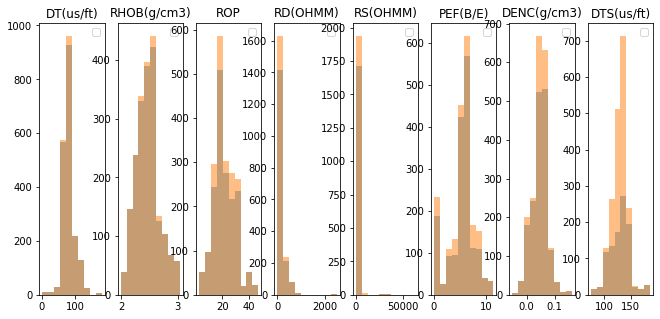

In [83]:
#estimate the missing variables of where missing

from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=1)
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from typing import Tuple
import matplotlib.pyplot as plt

# Scale X, Y, and MD, all with the same scaling factor as scaled_X

scaler = StandardScaler()
well_log["scaled_X"] = scaler.fit_transform(well_log["X"].to_numpy().reshape(-1, 1))
well_log["scaled_Y"] = scaler.transform(well_log["Y"].to_numpy().reshape(-1, 1))
well_log["scaled_MD"] = scaler.transform(well_log["MD(ft)"].to_numpy().reshape(-1, 1))

def knn_imp(well_log: pd.DataFrame,
            replace_var: str = 'DT(us/ft)', 
            predictors: Tuple[str] = ('scaled_X','scaled_Y','scaled_MD')) -> (pd.DataFrame, StandardScaler):
    """
    Imputes values using scaling, KNN model, and Grid CV.
    """
    parameters = {'weights': ('uniform', 'distance'), 
              'n_neighbors':[4, 6, 8, 10, 12]}

    knn = KNeighborsRegressor()
    gcv = GridSearchCV(knn, parameters, cv=KFold(random_state=2, shuffle=True), error_score="raise")
    
    missing_Var = well_log[replace_var].isnull()

    data = well_log.loc[~missing_Var, list(predictors) + [replace_var,]]
    columns = data.columns
    
    X = data[list(predictors)]
    y = data[replace_var]
    scaler = StandardScaler()
    y_scaled = scaler.fit_transform(y.values.reshape(-1,1))

    gcv.fit(X, y_scaled)
    
    print('')
    print(f'replace_var: {replace_var}')
    print(gcv.best_estimator_)
    print('')

    #test = gcv.predict(well_log.loc[missing_Var,predictors])
    well_log.loc[missing_Var, replace_var] = scaler.inverse_transform(gcv.predict(well_log.loc[missing_Var,predictors]))

    return well_log, gcv

cont_impute_features = ["DT(us/ft)", "RHOB(g/cm3)", "ROP", "RD(OHMM)", "RS(OHMM)", "PEF(B/E)", "DENC(g/cm3)", "DTS(us/ft)"  ]

fig, ax = plt.subplots(1, len(cont_impute_features), figsize=(11, 5))

for idx, feat in enumerate(cont_impute_features):
    ax[idx].hist(well_log[feat], alpha=.5)
    well_log, _ = knn_imp(well_log, feat)
    ax[idx].hist(well_log[feat], alpha=.5)
    ax[idx].legend()
    ax[idx].title.set_text(feat)

fig.show()

In [53]:
#now we predict porosity

from sklearn.preprocessing import (PolynomialFeatures, MaxAbsScaler, 
                                   MinMaxScaler, StandardScaler, RobustScaler)

missing_porosity = well_log['PORO(v/v)'].isnull()
porosity_df = well_log.drop('PORO(v/v)', axis =1)

scalers = [MaxAbsScaler(), MinMaxScaler(), StandardScaler(), RobustScaler()]

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('poly', PolynomialFeatures()),
    ('reg', LinearRegression())
])

params = {
    'scaler': scalers,
    'poly__degree': [1, 2, 3],
    'pca__n_components': [1, 2, 3, 4, 5, 6]
}

,count,mean,std,min,25%,50%,75%,max
MD(ft),1963.0,4673.224657,165.718326,4228.005683,4546.547858,4666.802978,4796.413228,5096.702794
Permeability(mD),221.0,10.497034,39.248645,0.000001,0.019500,0.094813,1.948104,352.697773
RHOB(g/cm3),1963.0,2.474240,0.205649,1.991035,2.330957,2.470859,2.581306,3.044163
DTS(us/ft),1963.0,128.095225,27.058906,-471.675434,120.919278,131.121628,138.698156,186.253964
DT(us/ft),1963.0,80.290026,17.668513,1.138524,69.583404,79.192870,87.540243,179.133001
PEF(B/E),1963.0,5.335173,2.516999,0.019155,4.423866,5.793296,6.565652,11.490936
RD(OHMM),1963.0,180.183009,174.638510,10.197411,77.656169,135.529165,207.862478,2508.770579
RS(OHMM),1963.0,584.943410,3155.562381,2.270108,78.748091,145.691438,262.706202,62290.800000
ROP,1963.0,20.213639,26.746833,-490.300267,16.638953,19.976639,27.310059,46.895400
DENC(g/cm3),1963.0,0.048014,0.026155,-0.050168,0.034009,0.051618,0.062748,0.161357


In [47]:
well_log.describe().T

,count,mean,std,min,25%,50%,75%,max
MD(ft),1963.0,4673.224657,165.718326,4228.005683,4546.547858,4666.802978,4796.413228,5096.702794
PORO(v/v),455.0,0.131140,0.062887,0.019566,0.072468,0.129662,0.185373,0.249241
Permeability(mD),221.0,10.497034,39.248645,0.000001,0.019500,0.094813,1.948104,352.697773
RHOB(g/cm3),1963.0,2.474240,0.205649,1.991035,2.330957,2.470859,2.581306,3.044163
DTS(us/ft),1963.0,128.095225,27.058906,-471.675434,120.919278,131.121628,138.698156,186.253964
DT(us/ft),1963.0,80.290026,17.668513,1.138524,69.583404,79.192870,87.540243,179.133001
PEF(B/E),1963.0,5.335173,2.516999,0.019155,4.423866,5.793296,6.565652,11.490936
RD(OHMM),1963.0,180.183009,174.638510,10.197411,77.656169,135.529165,207.862478,2508.770579
RS(OHMM),1963.0,584.943410,3155.562381,2.270108,78.748091,145.691438,262.706202,62290.800000
ROP,1963.0,20.213639,26.746833,-490.300267,16.638953,19.976639,27.310059,46.895400


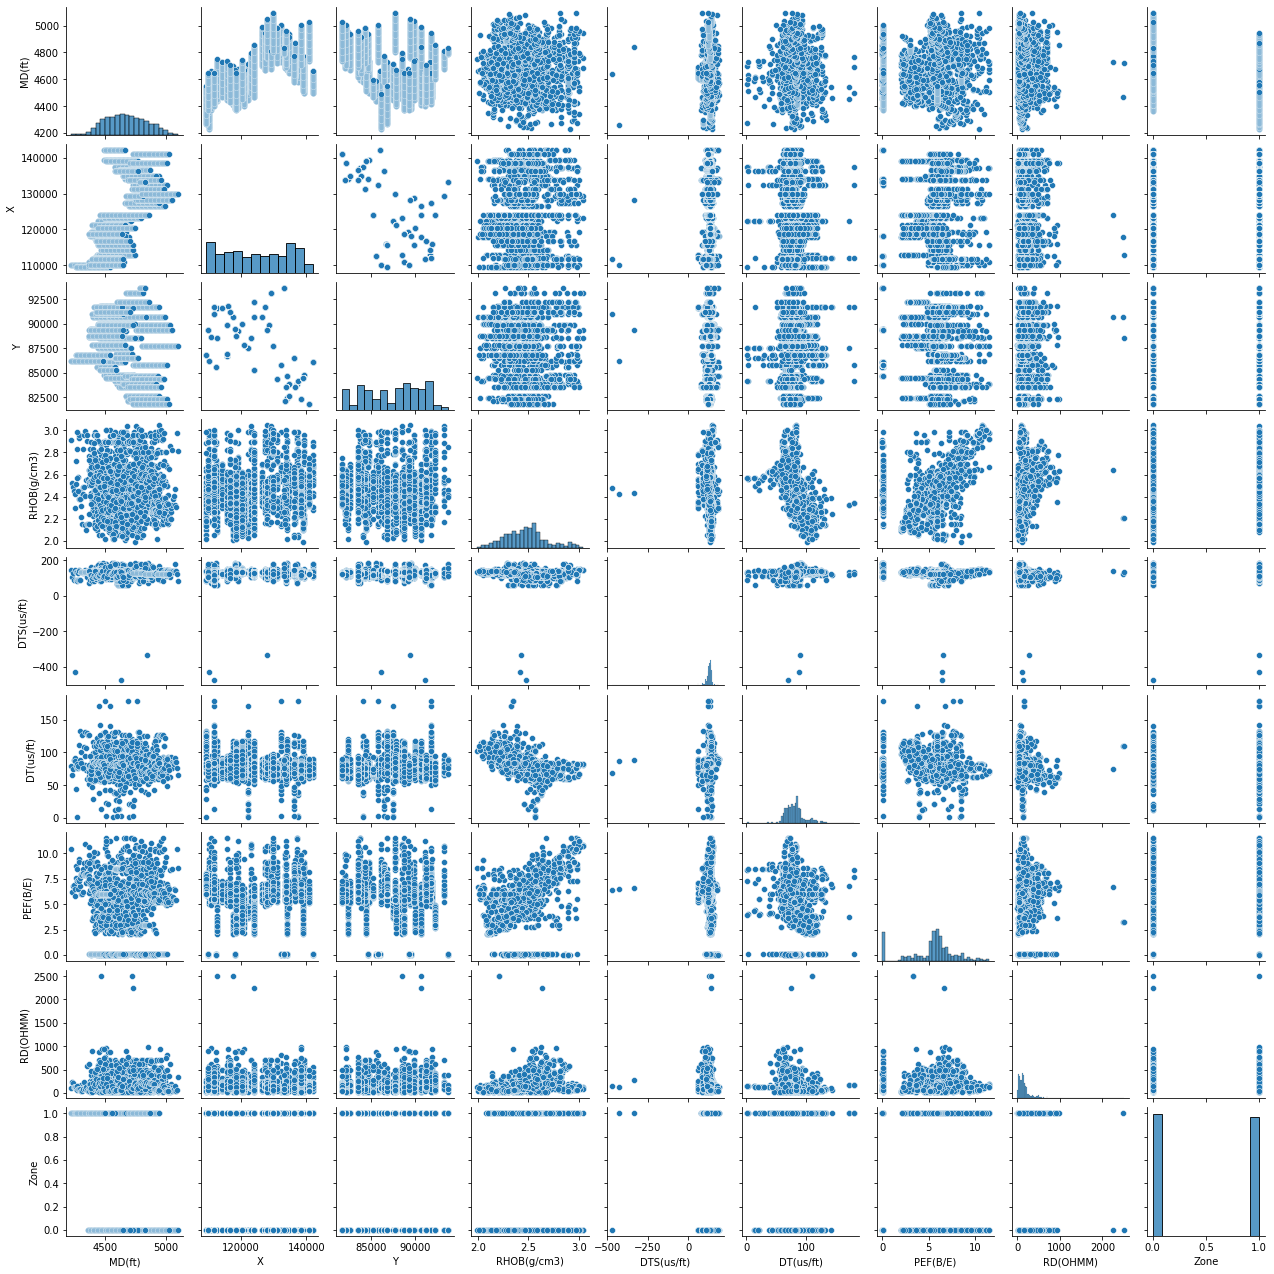

In [54]:
import seaborn as sns

sns.pairplot(well_log,vars=['MD(ft)','X','Y','RHOB(g/cm3)','DTS(us/ft)',
       'DT(us/ft)', 'PEF(B/E)', 'RD(OHMM)', 'Zone'],markers='o', height=2)

In [46]:
_.savefig("pairplot.png")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6b71fecc-b405-4b93-bce3-c5ed6c21c449' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>